# Project Name: Flame Monitoring: Visualization and Analysis of Fire Data in British Columbia, Canada

## Project Introduction
This project focuses on analyzing and visualizing fire data from British Columbia for the years 2013 to 2022. By meticulously studying the causes, locations, and scales of fires, it aims to provide robust data support for improving fire prevention and response strategies. The project delves into the annual variations of fire causes and utilizes geographic data visualization to clearly display the spatial distribution of fires. Additionally, it includes statistical analysis of fire sizes under different causes, and the creation of maps to show fire locations and related geographic features.


## Step 1: Data Preprocessing and Conversion

In this step, we extract fire data from a text file and convert it into a structured data format. Initially, the text data is read from a specified file path. Then, records are split using regular expressions, starting each record with longitude data. Following this, each record is parsed to extract details such as latitude, longitude, ID, and name along with embedded HTML content. The HTML content is parsed using BeautifulSoup to extract detailed fire information such as ignition date, geographic location, fire scale, etc.

After parsing, each piece of fire information is stored in a dictionary, and all dictionaries are collected into a list. Finally, this list is converted into a Pandas DataFrame and saved as a CSV file, facilitating subsequent data analysis and visualization tasks.


In [1]:
import re
from bs4 import BeautifulSoup
import pandas as pd

file_path = 'Firepoint2020-2021.txt' 
with open(file_path, 'r', encoding='utf-8') as file:
    data_str = file.read()

# Split data
fire_data = re.split(r'\n(?=-\d+\.\d+)', data_str.strip())
fires = []

# Traverse each piece of fire data
for fire in fire_data:
    parts = re.split(r'(<html.*?</html>)', fire, flags=re.DOTALL)
    if len(parts) < 3:
        continue  
    pre_info = parts[0].split(maxsplit=3)
    html_content = parts[1]
    post_info = parts[2].split()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.find_all('tr')
    fire_details = {}
    for row in table_rows:
        cells = row.find_all('td')
        if len(cells) == 2:
            key = cells[0].get_text(strip=True)
            value = cells[1].get_text(strip=True)
            fire_details[key] = value

    # Construct a dictionary for each fire
    fire_dict = {
        "XCoord": pre_info[0],
        "YCoord": pre_info[1],
        "OBJECTID": pre_info[2],
        "Name": pre_info[3],
        "Latitude": post_info[0],
        "Longitude": post_info[1],
        "Year": fire_details.get('YEAR', ''),
        "Fire Number": fire_details.get('Fire Number', ''),
        "Ignition Date": fire_details.get('IGNITION DATE', ''),
        "Geographic": fire_details.get('GEOGRAPHIC', ''),
        "Fire Size HA": fire_details.get('FIRE_SIZE_HA', ''),
        "Incident Name": fire_details.get('INCIDENT_NAME', '').replace('<Null>', ''),
        "Fire of Note Ind": fire_details.get('FIRE_OF_NOTE_IND', ''),
        "Response Type Desc": fire_details.get('RESPONSE_TYPE_DESC', '')
    }
    
    fires.append(fire_dict)

df = pd.DataFrame(fires)
csv_file_path = 'FireData2020-2021.csv'
df.to_csv(csv_file_path, index=False)

csv_file_path

'FireData2020-2021.csv'

In [2]:
# Same for 2013-2015 data
file_path = 'Firepoint2013-2015.txt'  
with open(file_path, 'r', encoding='utf-8') as file:
    fire_data_str = file.read()

fire_data = re.split(r'\n(?=-\d+\.\d+)', fire_data_str.strip())
fires = []


for fire in fire_data:
    parts = re.split(r'(<html.*?</html>)', fire, flags=re.DOTALL)
    if len(parts) < 3:
        continue  
    pre_info = parts[0].split(maxsplit=4)
    html_content = parts[1]
    
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.find_all('tr')
    fire_details = {}
    for row in table_rows[1:]:
        cells = row.find_all('td')
        if len(cells) == 2:
            key = cells[0].get_text(strip=True).replace(" ", "_").upper()
            value = cells[1].get_text(strip=True)
            fire_details[key] = value

    fire_dict = {
        "XCoord": pre_info[0],
        "YCoord": pre_info[1],
        "OBJECTID": pre_info[2],
        "Name": pre_info[3],
        "FIREYEAR": fire_details.get('FIREYEAR', ''),
        "FIRENUMBER": fire_details.get('FIRENUMBER', ''),
        "FIRETYPE": fire_details.get('FIRETYPE', ''),
        "LATITUDE": fire_details.get('LATITUDE', ''),
        "LONGITUDE": fire_details.get('LONGITUDE', ''),
        "CURRENTSIZE": fire_details.get('CURRENTSIZE', ''),
        "CAUSE_GENERAL_KMZ": fire_details.get('CAUSE_GENERAL_KMZ', '')
    }
    
    fires.append(fire_dict)

df = pd.DataFrame(fires)
csv_file_path = 'FireData2013-2015.csv' 
df.to_csv(csv_file_path, index=False)

print(f"Data processed and saved as {csv_file_path}")


Data processed and saved as FireData2013-2015.csv


In [3]:
# Same for 2015-2017 data
file_path = 'Firepoint2015-2017.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    data_str = file.read()

fire_data = re.split(r'\n(?=-\d+\.\d+)', data_str.strip())
fires = []

for fire in fire_data:
    parts = re.split(r'(<html.*?</html>)', fire, flags=re.DOTALL)
    if len(parts) < 3:
        continue
    pre_info = parts[0].split()
    html_content = parts[1]
    
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.find_all('tr')
    fire_details = {}
    for row in table_rows:
        cells = row.find_all('td')
        if len(cells) == 2:
            key = cells[0].get_text(strip=True).replace(" ", "_").upper().replace("CAUSE_GENERAL", "CAUSE_GENERAL_KMZ")
            value = cells[1].get_text(strip=True)
            fire_details[key] = value

    fire_dict = {
        "XCoord": pre_info[0],
        "YCoord": pre_info[1],
        "OBJECTID": pre_info[2],
        "Name": pre_info[3],
        "FIREYEAR": fire_details.get('FIREYEAR', ''),
        "FIRENUMBER": fire_details.get('FIRENUMBER', ''),
        "FIRETYPE": fire_details.get('FIRETYPE', ''),
        "LATITUDE": fire_details.get('LATITUDE', ''),
        "LONGITUDE": fire_details.get('LONGITUDE', ''),
        "CURRENTSIZE": fire_details.get('CURRENTSIZE', ''),
        "CAUSE_GENERAL_KMZ": fire_details.get('CAUSE_GENERAL_KMZ', '')
    }
    
    fires.append(fire_dict)

df = pd.DataFrame(fires)
output_csv_path = 'FireData2015-2017.csv'
df.to_csv(output_csv_path, index=False)

print(f"Data has been processed and saved to {output_csv_path}")


Data has been processed and saved to FireData2015-2017.csv


In [4]:
# Same for 2017-2019 data
file_path = 'Firepoint2017-2019.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    data_str = file.read()

fire_data = re.split(r'\n(?=-\d+\.\d+)', data_str.strip())

fires = []

for fire in fire_data:
    parts = re.split(r'(<html.*?</html>)', fire, flags=re.DOTALL)
    if len(parts) < 3:
        continue
    pre_info = parts[0].split()
    html_content = parts[1]
    
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.find_all('tr')
    fire_details = {}
    for row in table_rows:
        cells = row.find_all('td')
        if len(cells) == 2:
            key = cells[0].get_text(strip=True).replace(" ", "_").upper()
            value = cells[1].get_text(strip=True)
            fire_details[key] = value

    fire_dict = {
        "XCoord": pre_info[0],
        "YCoord": pre_info[1],
        "OBJECTID": pre_info[2],
        "Name": pre_info[3],
        "FIRE_NUMBER": fire_details.get('FIRE_NUMBER', ''),
        "FIRE_YEAR": fire_details.get('FIRE_YEAR', ''),
        "IGNITION_DATE": fire_details.get('IGNITION_DATE', ''),
        "GEOGRAPHIC_DESCRIPTION": fire_details.get('GEOGRAPHIC_DESCRIPTION', ''),
        "LATITUDE": fire_details.get('LATITUDE', ''),
        "LONGITUDE": fire_details.get('LONGITUDE', ''),
        "CURRENT_SIZE": fire_details.get('CURRENT_SIZE', '')
    }
    
    fires.append(fire_dict)

df = pd.DataFrame(fires)
output_csv_path = 'FireData2017-2019.csv'
df.to_csv(output_csv_path, index=False)

print(f"Data has been processed and saved to {output_csv_path}")


Data has been processed and saved to FireData2017-2019.csv


## Step 2: Data Standardization and Mergingew
This step focuses on standardizing and merging fire data across different years to align the format of datasets from various periods. Initially, a function is defined to unify the column names across all datasets. Then, mapping dictionaries are used to adjust the column names for each year-specific dataset. After standardizing the data, the datasets are merged into a single DataFrame, and duplicate records are removed to ensure data uniqueness and cleanliness.##

## Data Division
Due to the absence of ignition causes in the data from 2017 to 2022 and the lack of specific ignition dates in the data from 2013 to 2017, the data is divided into three parts:
1. The first part includes all years but only contains information about the year, size, and location of the fires.
2. The second file contains data from 2017 to 2022, including the year of ignition, location, size, and specific ignition dates.
3. The third file includes data from 2013 to 2017, detailing the year of ignition, location, size, and causes of the fires (either lightning or human).

These divisions allow for tailored analyses depending on the availability of specific data points in each period.


In [5]:
import pandas as pd

# Define a function to normalize the columns of the data frame
def standardize_df(df, columns):
    df['Latitude'] = df[columns['Latitude']]
    df['Longitude'] = df[columns['Longitude']]
    df['Year'] = df[columns['Year']]
    df['Fire_Number'] = df[columns['Fire_Number']]
    df['Fire_Size'] = df[columns['Fire_Size']]
    return df[['Latitude', 'Longitude', 'Year', 'Fire_Number', 'Fire_Size']]

col_mapping_2020_2021 = {
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Year': 'Year',
    'Fire_Number': 'Fire Number',
    'Fire_Size': 'Fire Size HA'
}

col_mapping_2017_2019 = {
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Year': 'FIRE_YEAR',
    'Fire_Number': 'FIRE_NUMBER',
    'Fire_Size': 'CURRENT_SIZE'
}

col_mapping_2015_2017 = {
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Year': 'FIREYEAR',
    'Fire_Number': 'FIRENUMBER',
    'Fire_Size': 'CURRENTSIZE'
}

col_mapping_2013_2015 = {
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Year': 'FIREYEAR',
    'Fire_Number': 'FIRENUMBER',
    'Fire_Size': 'CURRENTSIZE'
}

# Read the data
fire_2020_2021 = pd.read_csv('FireData2020-2021.csv')
fire_2017_2019 = pd.read_csv('FireData2017-2019.csv')
fire_2015_2017 = pd.read_csv('FireData2015-2017.csv')
fire_2013_2015 = pd.read_csv('FireData2013-2015.csv')

# Standardize the data
fire_2020_2021_std = standardize_df(fire_2020_2021, col_mapping_2020_2021)
fire_2017_2019_std = standardize_df(fire_2017_2019, col_mapping_2017_2019)
fire_2015_2017_std = standardize_df(fire_2015_2017, col_mapping_2015_2017)
fire_2013_2015_std = standardize_df(fire_2013_2015, col_mapping_2013_2015)

# Merge all dataframes
fire_all = pd.concat([fire_2020_2021_std, fire_2017_2019_std, fire_2015_2017_std, fire_2013_2015_std])

# Remove duplicates
fire_all = fire_all.drop_duplicates(subset=['Fire_Number'], keep='first')
fire_all.reset_index(drop=True, inplace=True)


print(fire_all.head())
fire_all.to_csv('Fire_all.csv', index=False)


    Latitude   Longitude  Year Fire_Number  Fire_Size
0  52.623006 -121.019483  2022      C31003      0.090
1  51.014706 -122.375433  2022      K71995   4683.000
2  49.543989 -118.872232  2022      N61926      0.009
3  50.472173 -120.567882  2022      K21429      0.100
4  49.221423 -121.489715  2022      V11888    167.000


In [6]:
# Load data
fire_data_2020_2021 = pd.read_csv('FireData2020-2021.csv')
fire_data_2017_2019 = pd.read_csv('FireData2017-2019.csv')

fire_data_2020_2021.rename(columns={
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Year': 'Year',
    'Fire Number': 'Fire_Number',
    'Ignition Date': 'Ignition_Date',
    'Fire Size HA': 'Fire_Size'
}, inplace=True)

fire_data_2017_2019.rename(columns={
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'FIRE_YEAR': 'Year',
    'FIRE_NUMBER': 'Fire_Number',
    'IGNITION_DATE': 'Ignition_Date',
    'CURRENT_SIZE': 'Fire_Size'
}, inplace=True)

all_fire_data = pd.concat([fire_data_2017_2019, fire_data_2020_2021], ignore_index=True)

# devide Ignition Date
all_fire_data['Ignition_Date'] = all_fire_data['Ignition_Date'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# choose 
final_fire_data = all_fire_data[['Latitude', 'Longitude', 'Year', 'Fire_Number', 'Fire_Size', 'Ignition_Date']]

final_fire_data.to_csv('Fire_date_2017_2022.csv', index=False)


In [7]:
fire_data_2013_2015 = pd.read_csv('FireData2013-2015.csv')
fire_data_2015_2017 = pd.read_csv('FireData2015-2017.csv')

combined_fire_data = pd.concat([fire_data_2013_2015, fire_data_2015_2017], ignore_index=True)

# Change"Person" to "Human"
combined_fire_data['CAUSE_GENERAL_KMZ'] = combined_fire_data['CAUSE_GENERAL_KMZ'].replace('Person', 'Human')

combined_fire_data.drop_duplicates(subset=['FIRENUMBER'], inplace=True)

final_fire_course = combined_fire_data[['LATITUDE', 'LONGITUDE', 'FIREYEAR', 'FIRENUMBER', 'CURRENTSIZE', 'CAUSE_GENERAL_KMZ']].copy()
final_fire_course.rename(columns={
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'FIREYEAR': 'Year',
    'FIRENUMBER': 'Fire_Number',
    'CURRENTSIZE': 'Fire_Size',
    'CAUSE_GENERAL_KMZ': 'Fire_Course'
}, inplace=True)

final_fire_course.to_csv('Fire_course_2013_2017.csv', index=False)

print(final_fire_course.head())


    Latitude   Longitude  Year Fire_Number  Fire_Size Fire_Course
0  49.340450 -122.874916  2015      V10006      0.009       Human
1  49.098434 -121.708435  2015      V10010      0.300       Human
2  49.369450 -121.849632  2015      V10018      0.700       Human
3  49.326466 -121.903603  2015      V10078      0.300       Human
4  49.045399 -122.013016  2015      V10081      0.100   Lightning


## Step 3: Annual Fire Analysis and Visualization

### Overview
This step involves the annual analysis of fire data to demonstrate the changes in fire frequency and size across British Columbia. Initially, the consolidated fire data file is loaded, and the data is grouped by year to calculate the annual number of fires and the total fire area. Subsequently, a dual-axis chart is created using Matplotlib, where one axis displays the annual number of fires and the other shows the total fire area. This visualization provides a clear comparison of fire activities across different years.

### Geographical Data Visualization
In addition to numerical analysis, geographical visualization is conducted for each year to map the locations and sizes of fires. By converting the fire area into the diameter of visual points, the chart distinctly illustrates the distribution of fires of different sizes. This method enhances the understanding of fire dynamics over the years, providing a comprehensive visual representation of fire data.


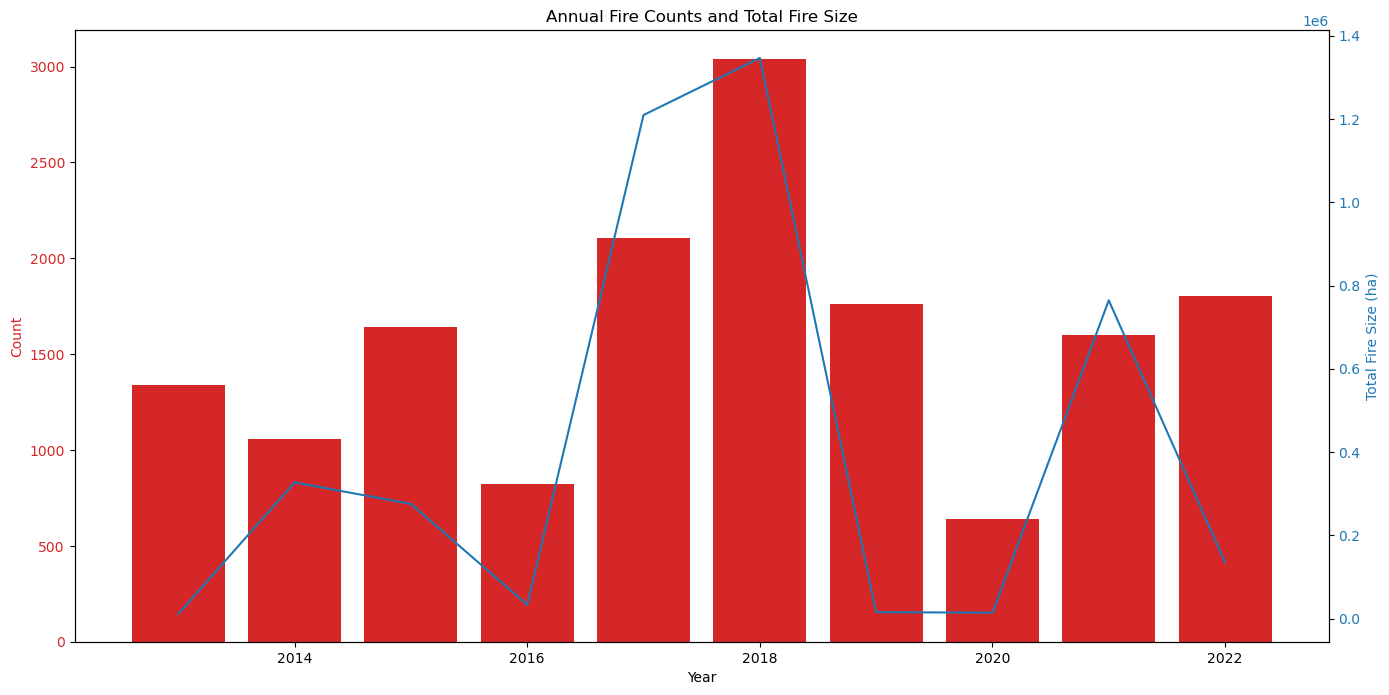

In [8]:
import matplotlib.pyplot as plt
# Load the data
file_path = 'Fire_all.csv'  
fire_data = pd.read_csv(file_path)

# Grouping the data by year and calculating count and sum of fire size
yearly_data = fire_data.groupby('Year').agg(Count=('Fire_Number', 'count'), Total_Fire_Size=('Fire_Size', 'sum'))

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Count', color=color)
ax1.bar(yearly_data.index, yearly_data['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total Fire Size (ha)', color=color)
ax2.plot(yearly_data.index, yearly_data['Total_Fire_Size'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Annual Fire Counts and Total Fire Size')
plt.show()


ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


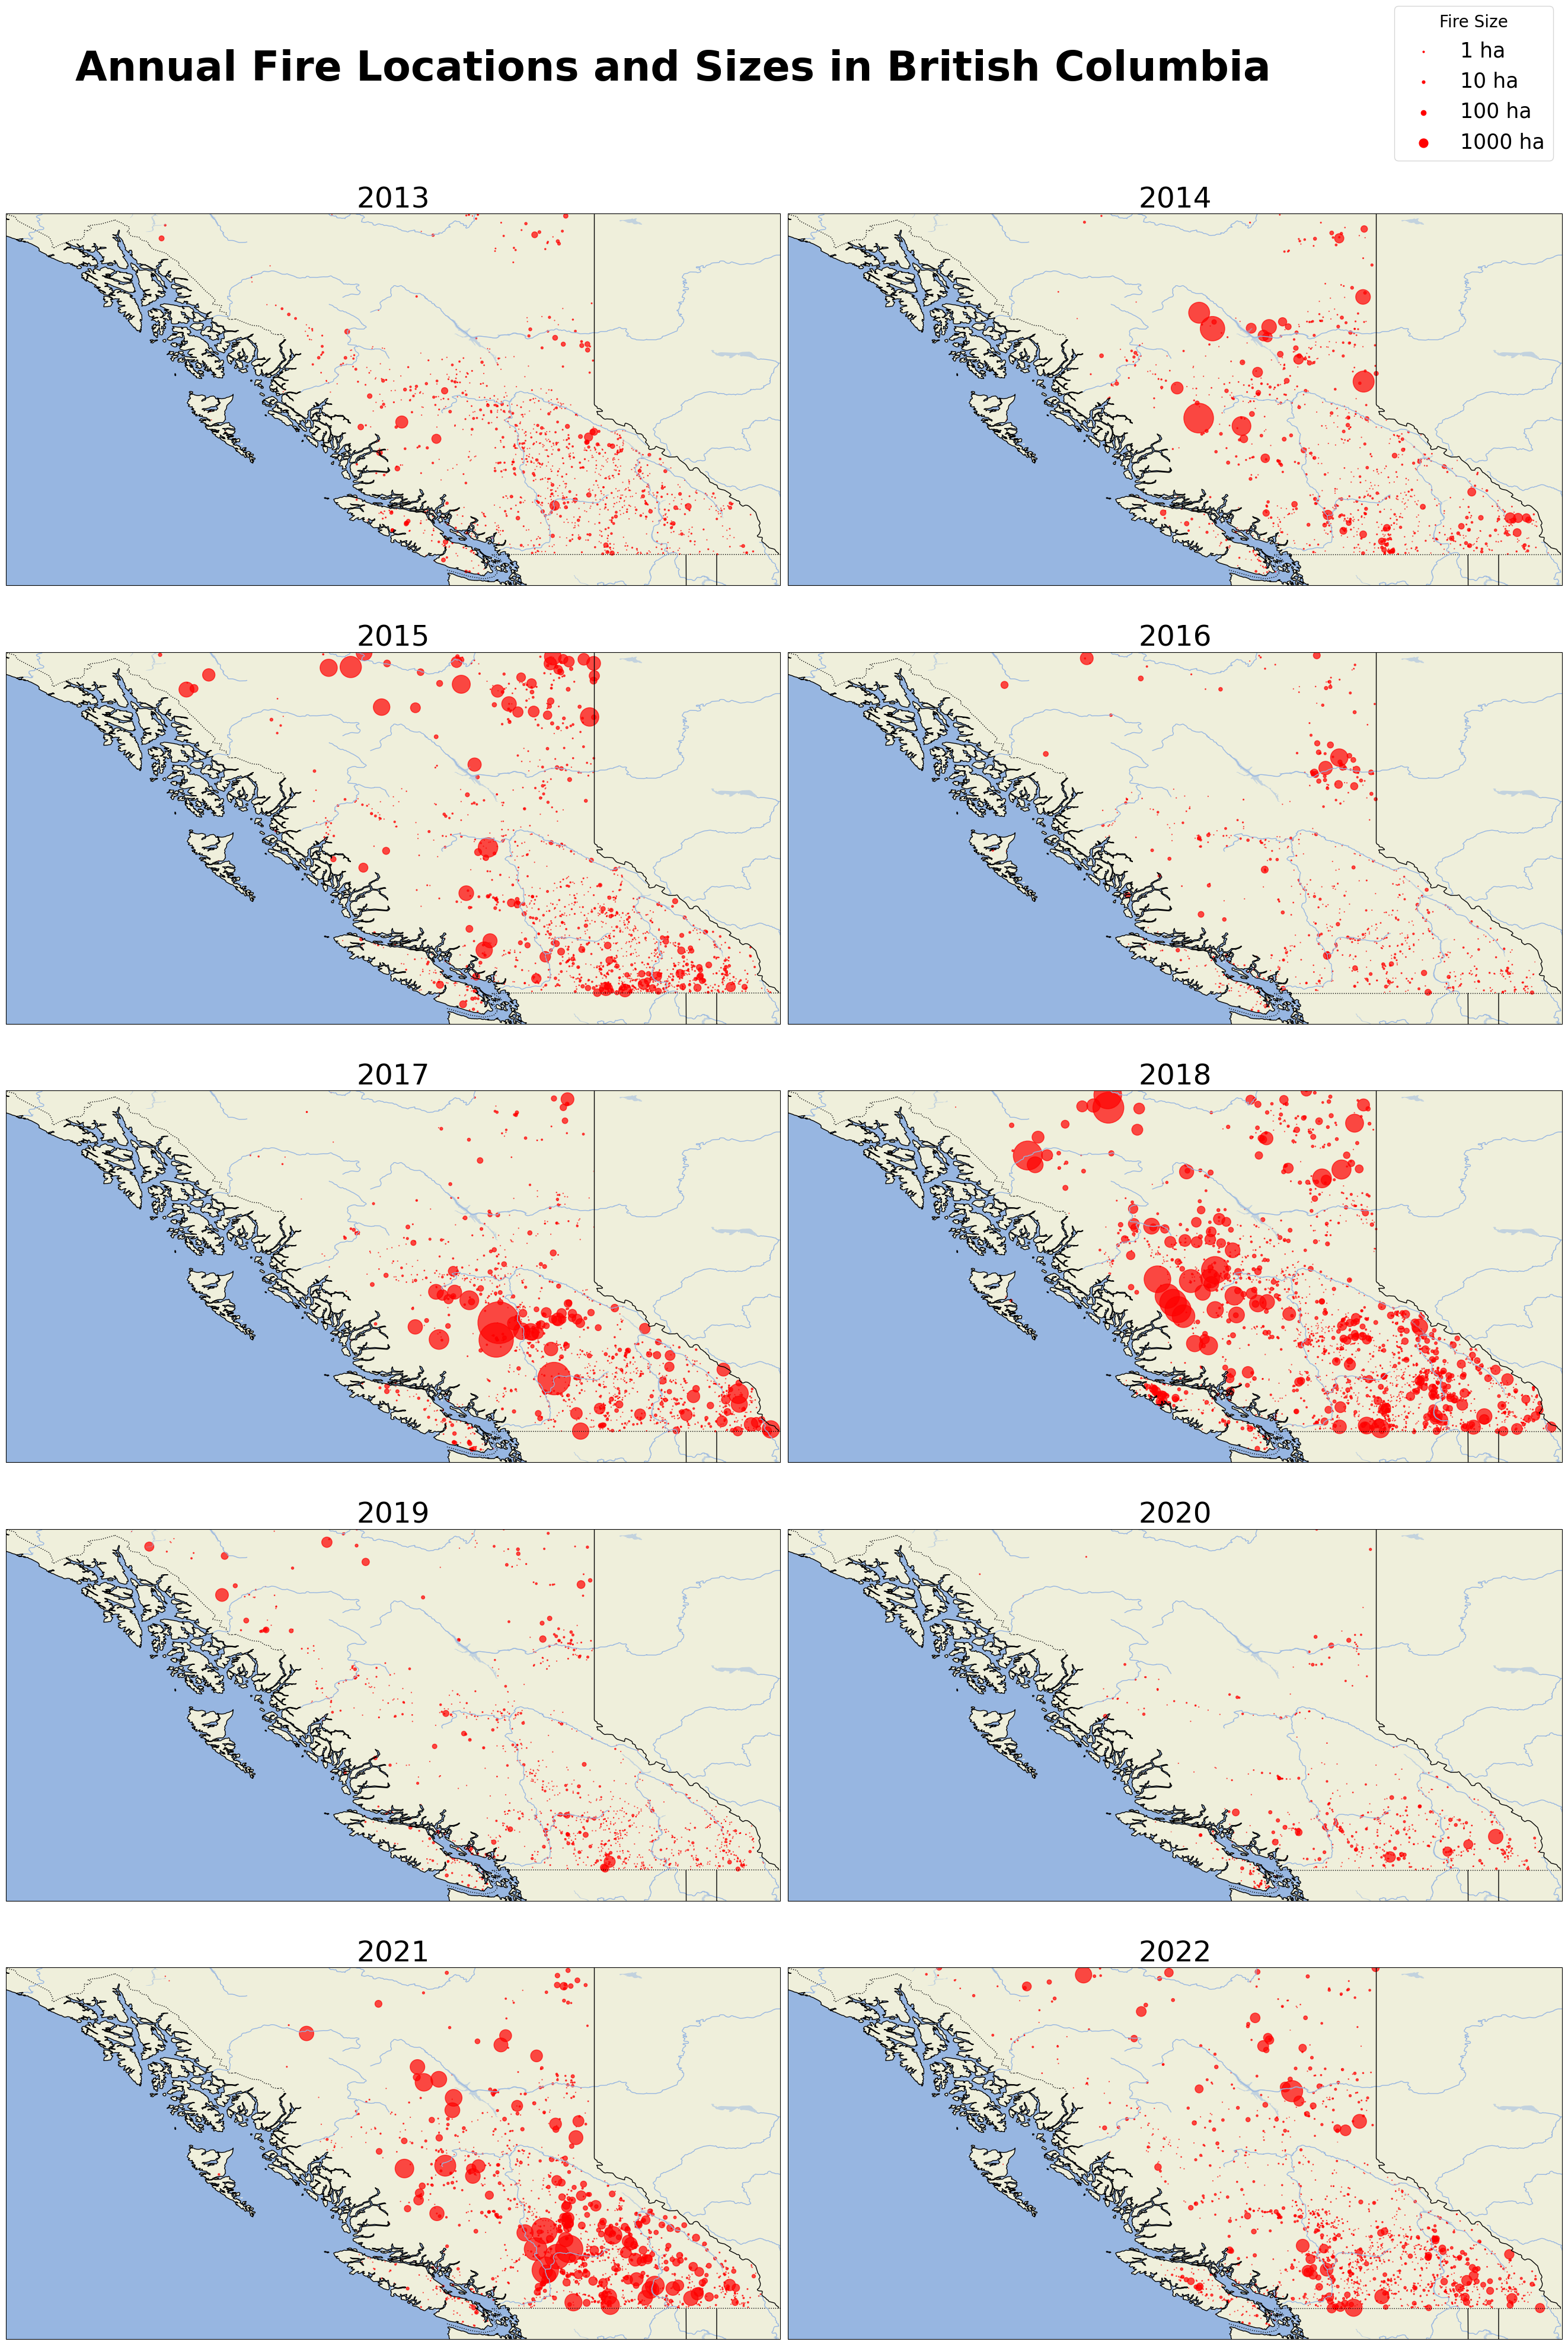

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import cartopy.feature as cfeature
from matplotlib.legend_handler import HandlerBase

# Load the data
file_path = 'Fire_all.csv'  
fire_data = pd.read_csv(file_path)

# Get unique years
years = np.unique(fire_data['Year'])

# Base map setup, [west, east, south, north] limits for BC
extent = [-139, -114, 48, 60]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 45), subplot_kw={'projection': ccrs.PlateCarree()}, 
                         gridspec_kw={'right':1, 'wspace': 0.01, 'hspace': 0.01})
# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, year in zip(axes, years):
    ax.set_title(f"{year}", fontsize=35)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Filter data for the year
    yearly_data = fire_data[fire_data['Year'] == year]
    # Convert fire size to point diameter for visualization, 10 square pixels per hectare
    area_per_ha = 10  
    area_pixels = yearly_data['Fire_Size'] * area_per_ha
    diameters = 2 * np.sqrt(area_pixels / np.pi)  
    # Plot fires
    ax.scatter(yearly_data['Longitude'], yearly_data['Latitude'], s=diameters, color='red', alpha=0.7, transform=ccrs.PlateCarree())
    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '50m', edgecolor='black', facecolor='none'))
# Create a legend with a custom handler
class HandlerCircle(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        r = np.sqrt((height * height) / np.pi)
        return [plt.Circle((0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent), r, fc=orig_handle.get_facecolor(), transform=trans)]

sizes = [1, 10, 100, 1000]  
labels = [f"{size} ha" for size in sizes]
points = [plt.scatter([], [], s=2 * np.sqrt(size * area_per_ha / np.pi), color="red") for size in sizes]

# Add legend to the figure, outside of subplots
fig.legend(points, labels, handler_map={plt.Circle: HandlerCircle()}, title="Fire Size", loc='upper left', fontsize=25, title_fontsize=20, bbox_to_anchor=(0.9, 1))


# Add a central title for the whole figure
fig.suptitle('Annual Fire Locations and Sizes in British Columbia', fontsize=50, fontweight='bold')
fig.subplots_adjust(top=0.93)

plt.show()


## Step 4: Monthly and Seasonal Fire Analysis and Visualization

### Overview
This step involves a detailed analysis of fire data on a monthly and seasonal basis to reveal variations in fire frequency and size throughout the year. Initially, the data is loaded and processed, extracting information for each month and season, followed by calculating the corresponding fire frequency and total area. Charts are created using Matplotlib to visually display this data, offering a comparison of fire dynamics at different times throughout the year.

### Data Visualization
Building on statistical analysis, this step also includes the visualization of the spatial distribution and scale of fires. Fires for each month and season are displayed in charts, not only reflecting their frequency but also illustrating their geographical distribution and impact size. These charts aid in a deeper understanding of the seasonal and monthly variations in fire characteristics, providing a comprehensive visual and quantitative interpretation.


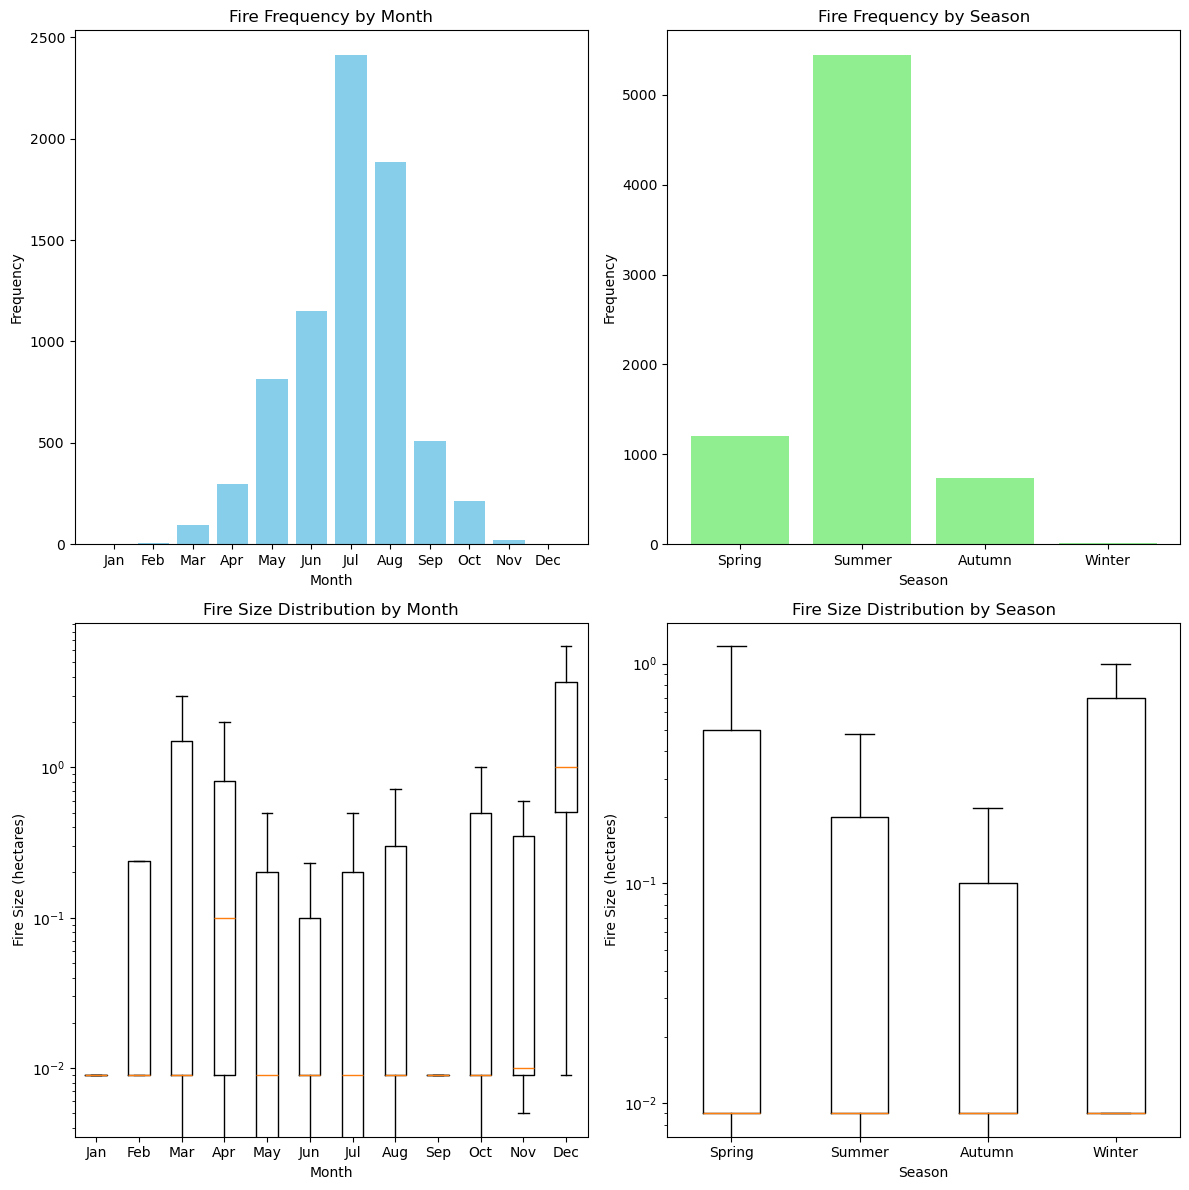

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
fire_data = pd.read_csv('Fire_date_2017_2022.csv')

# Convert 'Ignition_Date' to datetime and extract month and season
fire_data['Ignition_Date'] = pd.to_datetime(fire_data['Ignition_Date'], errors='coerce')
fire_data['Month'] = fire_data['Ignition_Date'].dt.month

# Define a function to categorize seasons in the Northern Hemisphere
def month_to_season(month):
    if month in {12, 1, 2}:
        return 'Winter'
    elif month in {3, 4, 5}:
        return 'Spring'
    elif month in {6, 7, 8}:
        return 'Summer'
    elif month in {9, 10, 11}:
        return 'Autumn'

fire_data['Season'] = fire_data['Month'].apply(month_to_season)

# Correct way to fill missing values to avoid FutureWarning
fire_data['Fire_Size'] = fire_data['Fire_Size'].fillna(fire_data['Fire_Size'].median())

# Group by month and season to calculate fire counts
monthly_fire_counts = fire_data.groupby('Month').size()
seasonal_fire_counts = fire_data.groupby('Season').size()

# Month abbreviations
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plotting fire frequency by month
axs[0, 0].bar(months, monthly_fire_counts.values, color='skyblue')
axs[0, 0].set_title('Fire Frequency by Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xticks(range(0, 12))
axs[0, 0].set_xticklabels(months)

# Plotting fire frequency by season
seasonal_fire_counts = seasonal_fire_counts.reindex(season_order)
axs[0, 1].bar(season_order, seasonal_fire_counts.values, color='lightgreen')
axs[0, 1].set_title('Fire Frequency by Season')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xticks(range(len(season_order)))
axs[0, 1].set_xticklabels(season_order)

# Plotting fire size distribution by month
month_sizes = [fire_data.loc[fire_data['Month'] == i+1, 'Fire_Size'] for i in range(12)]
axs[1, 0].boxplot(month_sizes, showfliers=False)
axs[1, 0].set_title('Fire Size Distribution by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Fire Size (hectares)')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(months)

# Plotting fire size distribution by season
season_sizes = [fire_data.loc[fire_data['Season'] == season, 'Fire_Size'] for season in season_order]
axs[1, 1].boxplot(season_sizes, showfliers=False)
axs[1, 1].set_title('Fire Size Distribution by Season')
axs[1, 1].set_xlabel('Season')
axs[1, 1].set_ylabel('Fire Size (hectares)')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xticks(range(1, 5))
axs[1, 1].set_xticklabels(season_order)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Step 5: Analysis of Fire Causes and Their Annual Trends

This phase of the project involves a comprehensive analysis of fire data from 2013 to 2017, focusing on the causes of fires and their annual variations. The data is loaded from a specified file path and then categorized and counted by year and cause of fire. This helps in understanding the dynamics of fire incidents over the years and the effectiveness of various prevention and control measures.


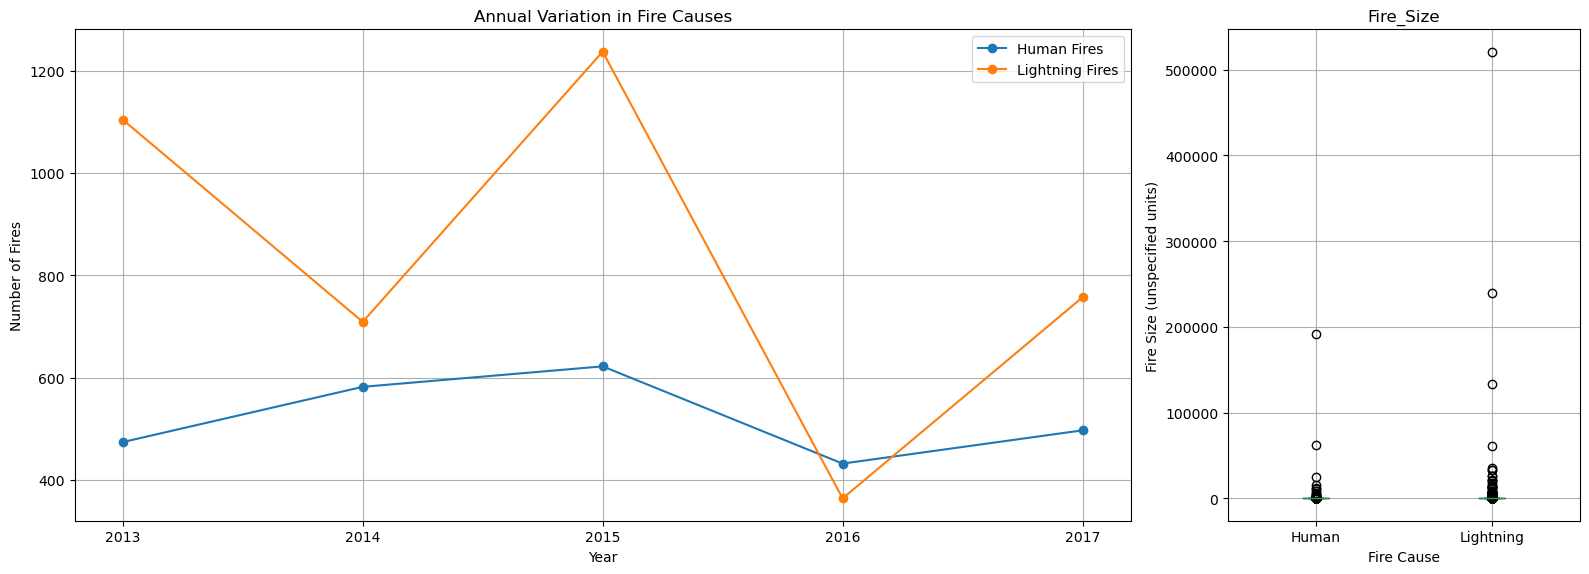

In [11]:
file_path = 'Fire_course_2013_2017.csv'  
fire_data = pd.read_csv(file_path)

annual_cause_counts = fire_data.groupby(['Year', 'Fire_Course']).size().unstack(fill_value=0)
annual_cause_counts['Total_Fires'] = annual_cause_counts.sum(axis=1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

for cause in annual_cause_counts.columns[:-1]:  
    axs[0].plot(annual_cause_counts.index, annual_cause_counts[cause], marker='o', label=f'{cause} Fires')
axs[0].set_title('Annual Variation in Fire Causes')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Fires')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(annual_cause_counts.index)
axs[0].set_xticklabels(annual_cause_counts.index.astype(int))

fire_data.boxplot(column='Fire_Size', by='Fire_Course', ax=axs[1])
axs[1].set_xlabel('Fire Cause')
axs[1].set_ylabel('Fire Size (unspecified units)')
axs[1].grid(True)
plt.suptitle('')

plt.tight_layout()
plt.show()


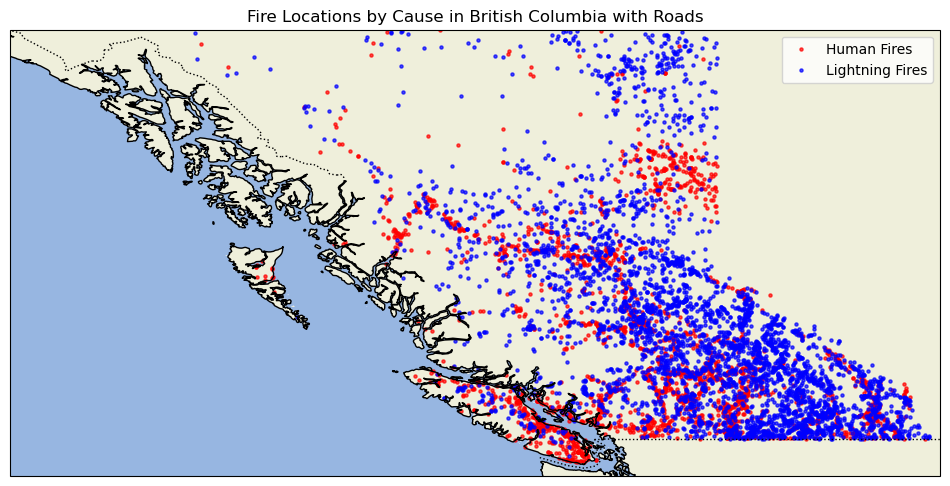

In [12]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.set_extent([-139, -114, 48, 60], crs=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND)  
ax.add_feature(cfeature.OCEAN)  
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 

colors = {'Human': 'red', 'Lightning': 'blue'}
for cause, color in colors.items():
    subset = fire_data[fire_data['Fire_Course'] == cause]
    ax.scatter(subset['Longitude'], subset['Latitude'], color=color, s=5, label=f'{cause} Fires', alpha=0.7)  
plt.title('Fire Locations by Cause in British Columbia with Roads')
plt.legend()
plt.show()
